# importing required libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import plotly.express as px

%matplotlib inline

In [4]:
artists = pd.read_csv('Data/Artists.csv')
np.random.seed(0)
artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.0000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.9630,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.1111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.0000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2
27617,黃品源,0.541000,0.578000,293840.0000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2
27618,黃國隆,0.785455,0.570818,174582.7273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11
27619,黃蜀娟,0.925143,0.322262,212989.8571,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42


In [5]:
artists.head(50)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.00000,0.386336,2.271740e-02,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.00000,0.406808,8.115826e-02,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.00000,0.286571,2.459295e-02,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.96300,0.245770,7.358728e-02,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.11110,0.429333,3.753356e-02,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.94440,0.309906,4.695657e-03,0.274767,-18.266389,0.098022,118.648944,0.441556,34.166667,5,1,36
6,"""Mama"" Helen Teagarden",0.725000,0.637000,135533.00000,0.512000,1.860000e-01,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2
7,"""Mista Dj Paul",0.006900,0.849000,123040.00000,0.487000,4.640000e-01,0.146000,-9.664000,0.351000,170.981000,0.499000,36.000000,4,0,1
8,"""Test for Victor Young""",0.927000,0.734000,175693.00000,0.474000,7.620000e-02,0.737000,-10.544000,0.256000,132.788000,0.902000,2.000000,10,1,2
9,"""Weird Al"" Yankovic",0.176934,0.664788,218165.25760,0.685136,4.630000e-05,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132


# Data Processing

In [6]:
missing_values = artists.isnull().sum()
missing_values[0:50]

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

In [7]:
total_cells = np.product(artists.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells)*100
print(percent_missing)

0.0


In [8]:
artists1 = artists.loc[:, 'loudness':'count']
print(artists1)

        loudness  speechiness       tempo   valence  popularity  key  mode  \
0     -14.205417     0.180675  115.983500  0.334433   38.000000    5     1   
1     -10.690000     0.176212  103.044154  0.268865   33.076923    5     1   
2     -15.230714     0.118514   77.375857  0.354857   34.285714    0     1   
3     -15.639370     0.123200   88.667630  0.372030   34.444444    0     1   
4     -11.447222     0.086000  120.329667  0.458667   42.555556   11     1   
...          ...          ...         ...       ...         ...  ...   ...   
27616  -9.524000     0.033900  131.261000  0.278000   35.000000   10     1   
27617 -11.974000     0.026700  135.934000  0.243000   47.000000    9     0   
27618 -21.610091     0.054355  119.586273  0.741273   20.000000    5     1   
27619 -19.256714     0.055571  111.685381  0.267033   23.000000   10     1   
27620  -9.103000     0.039500  200.341000  0.352000   34.000000   11     1   

       count  
0         12  
1         26  
2          7  
3  

In [9]:
artists2 = artists.loc[:, 'artists':'liveness']
print(artists2)

                                                 artists  acousticness  \
0                       "Cats" 1981 Original London Cast      0.575083   
1                              "Cats" 1983 Broadway Cast      0.862538   
2            "Fiddler On The Roof” Motion Picture Chorus      0.856571   
3         "Fiddler On The Roof” Motion Picture Orchestra      0.884926   
4      "Joseph And The Amazing Technicolor Dreamcoat"...      0.605444   
...                                                  ...           ...   
27616                                                鳳飛飛      0.884000   
27617                                                黃品源      0.541000   
27618                                                黃國隆      0.785455   
27619                                                黃蜀娟      0.925143   
27620                                                 黑豹      0.381000   

       danceability  duration_ms    energy  instrumentalness  liveness  
0          0.442750  247260.0000  0.38

In [10]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 15 columns):
artists             27621 non-null object
acousticness        27621 non-null float64
danceability        27621 non-null float64
duration_ms         27621 non-null float64
energy              27621 non-null float64
instrumentalness    27621 non-null float64
liveness            27621 non-null float64
loudness            27621 non-null float64
speechiness         27621 non-null float64
tempo               27621 non-null float64
valence             27621 non-null float64
popularity          27621 non-null float64
key                 27621 non-null int64
mode                27621 non-null int64
count               27621 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 3.2+ MB


In [11]:
artists.isnull()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27617,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27618,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27619,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
artists.dropna() 

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.0000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.9630,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.1111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.0000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2
27617,黃品源,0.541000,0.578000,293840.0000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2
27618,黃國隆,0.785455,0.570818,174582.7273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11
27619,黃蜀娟,0.925143,0.322262,212989.8571,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42


In [13]:
artists.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
mean,0.504651,0.544411,2.374886e+05,0.493708,0.166661,0.203603,-11.222480,0.096180,115.439232,0.516032,34.288478,5.409942,0.767170,14.313493
std,0.369788,0.176098,1.209766e+05,0.253566,0.292133,0.140311,5.819377,0.116062,25.138470,0.243304,22.104194,3.485676,0.422643,53.867027
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.128784,0.429000,1.819730e+05,0.282000,0.000004,0.111667,-14.097000,0.039500,98.725500,0.334000,13.511111,2.000000,1.000000,2.000000
50%,0.493000,0.555667,2.176930e+05,0.501000,0.001610,0.162850,-10.135333,0.052644,114.950000,0.528500,39.000000,6.000000,1.000000,3.000000
75%,0.901000,0.673000,2.660000e+05,0.699000,0.188000,0.247371,-6.906000,0.098000,129.612647,0.705000,51.000000,8.000000,1.000000,9.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


In [14]:
artists.fillna(27621.493)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.0000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.9630,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.1111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.0000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2
27617,黃品源,0.541000,0.578000,293840.0000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2
27618,黃國隆,0.785455,0.570818,174582.7273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11
27619,黃蜀娟,0.925143,0.322262,212989.8571,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42


# Here are some plots to get to check the data

AxesSubplot(0.125,0.125;0.775x0.755)


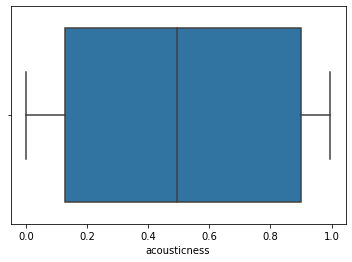

In [15]:
print(sns.boxplot(x='acousticness', data=artists))

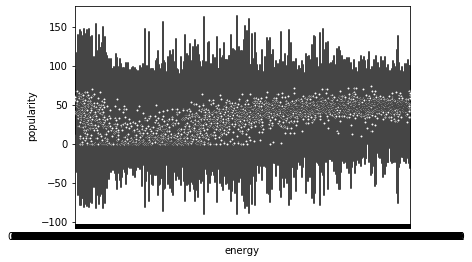

In [16]:
sns.violinplot(x='energy', y='popularity', split=True, data=artists)

In [17]:
a1 = artists.quantile(0.493000)
a2 = artists.quantile(0.901000)
iqr = a2 - a1
print(iqr)

acousticness             0.504000
danceability             0.214500
duration_ms         114546.312462
energy                   0.339995
instrumentalness         0.761599
liveness                 0.204956
loudness                 5.191705
speechiness              0.166902
tempo                   31.198192
valence                  0.317000
popularity              22.200000
key                      5.000000
mode                     0.000000
count                   25.000000
dtype: float64


In [18]:
print(artists['acousticness'].quantile(0.493000))
print(artists['energy'].quantile(0.501000))

0.47700000000000004
0.50262657134


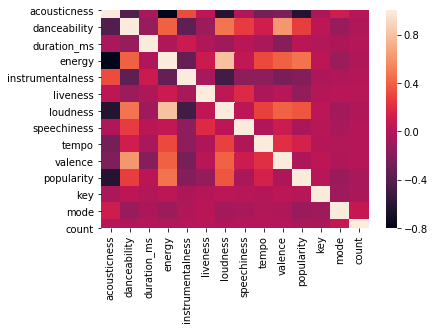

In [19]:
artists.corr()
sns.heatmap(artists.corr())

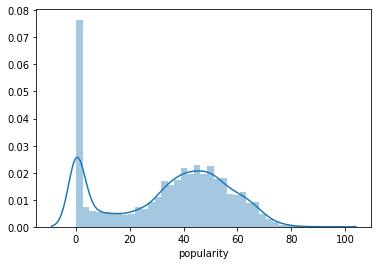

In [20]:
sns.distplot(artists['popularity'],kde=True)

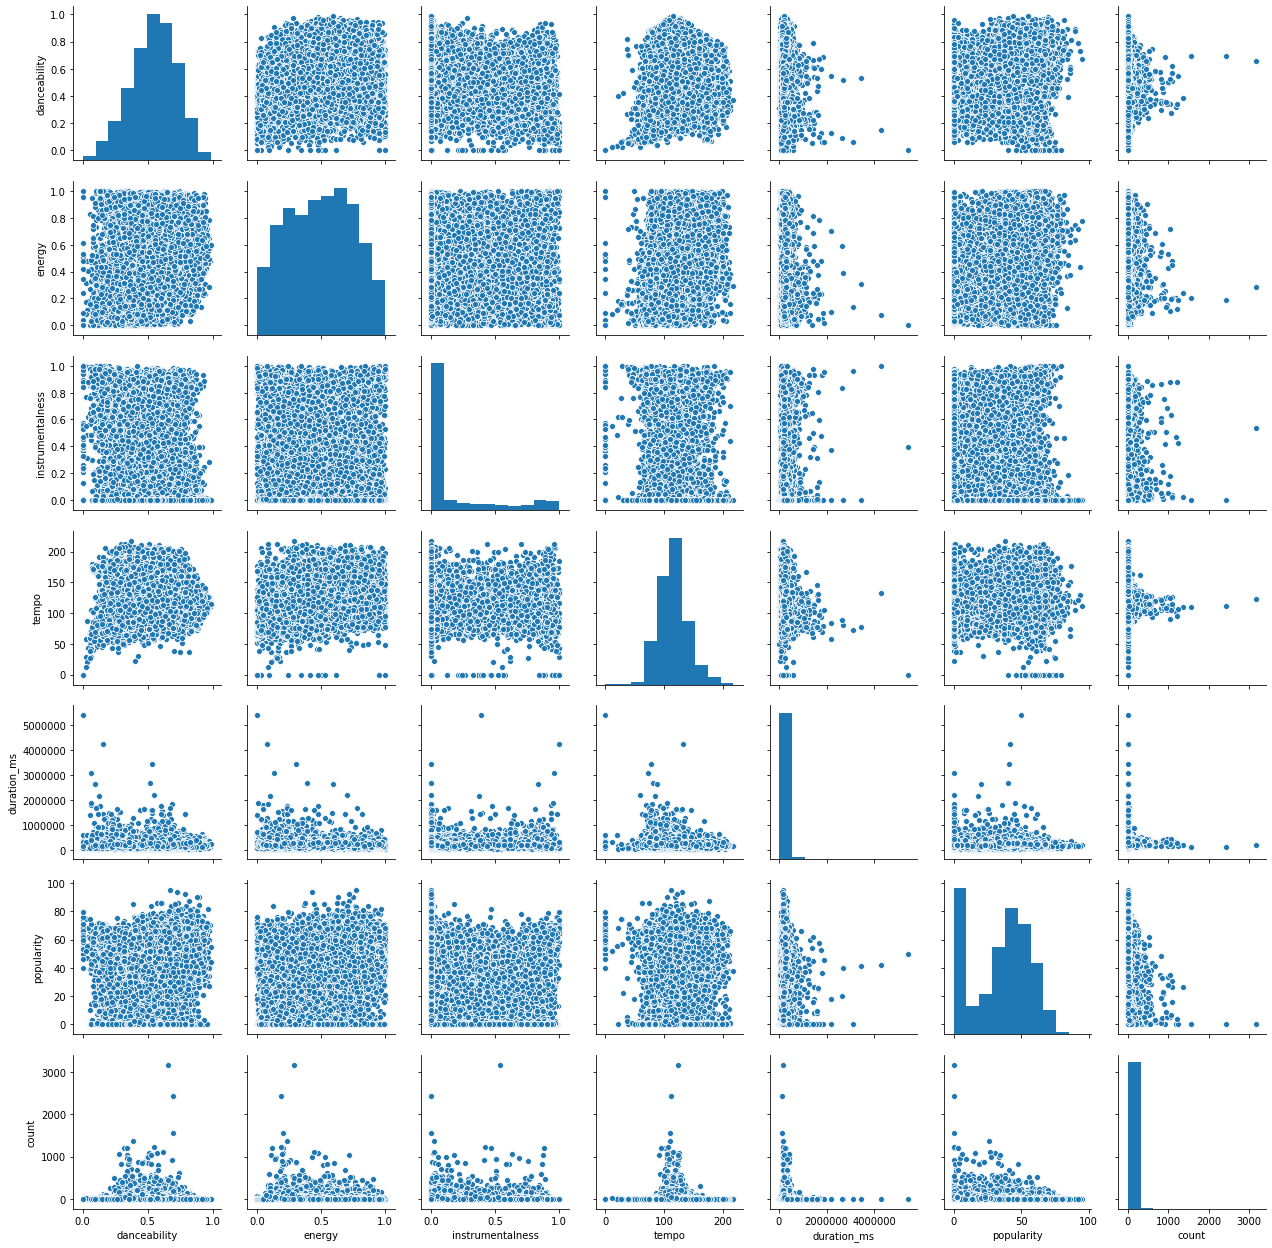

In [21]:
datall = artists[['danceability', 'energy', 'instrumentalness', 
                  'tempo', 'duration_ms', 'popularity', 'count']]
sns.pairplot(datall)

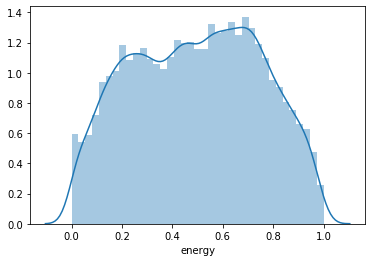

In [22]:
sns.distplot(artists['energy'], kde=True)

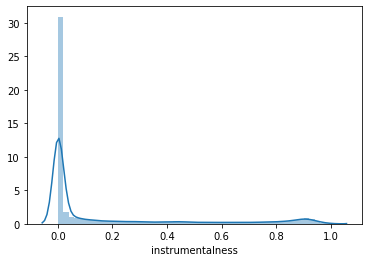

In [23]:
sns.distplot(artists['instrumentalness'], kde=True)

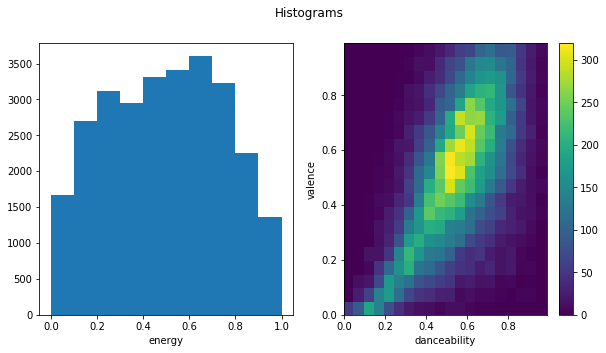

In [24]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(artists[x], artists[y], bins=20)
ax1.hist(artists["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

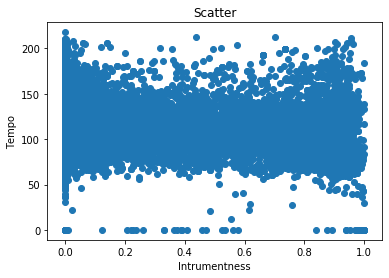

In [25]:
x1 = artists['instrumentalness']
y1 = artists['tempo']

plt.title('Scatter')
plt.scatter(x1,y1)

plt.xlabel('Intrumentness')
plt.ylabel('Tempo')
plt.show()

<Figure size 864x504 with 0 Axes>

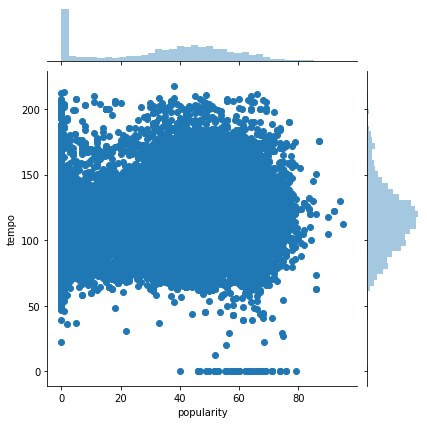

In [26]:
fig = plt.figure(figsize=(12,7))
sns.jointplot(x='popularity',y='tempo',data=artists,kind='scatter')

<Figure size 864x504 with 0 Axes>

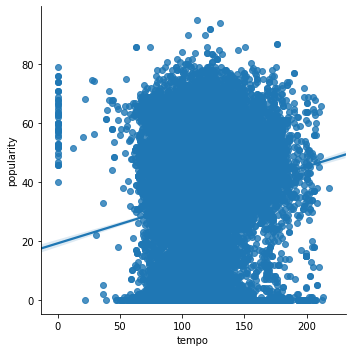

In [27]:
fig = plt.figure(figsize=(12,7))
sns.lmplot(x='tempo',y='popularity',data=artists)

<Figure size 864x504 with 0 Axes>

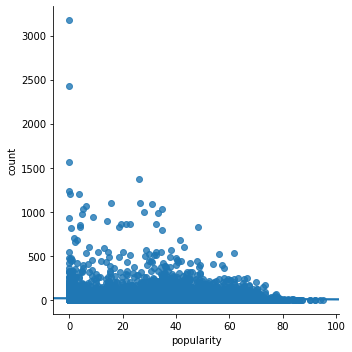

In [28]:
fig = plt.figure(figsize=(12,7))
sns.lmplot(x='popularity',y='count',data=artists)

<Figure size 864x504 with 0 Axes>

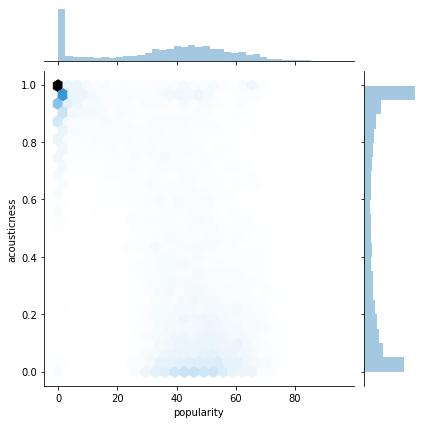

In [31]:
palette = sns.color_palette('bright')
fig = plt.figure(figsize=(12,7))
sns.jointplot(x='popularity',y='acousticness',data=artists,kind='hex')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = artists[['tempo','duration_ms','key', 'popularity']]
y = artists['mode']

In [34]:
y

0        1
1        1
2        1
3        1
4        1
        ..
27616    1
27617    0
27618    1
27619    1
27620    1
Name: mode, Length: 27621, dtype: int64

In [35]:
x.shape

(27621, 4)

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [103]:
y.shape

(27621,)

In [104]:
lm = LinearRegression()

In [105]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lm.coef_

array([ 2.01169954e-04, -9.13594990e-08, -1.00718981e-02, -2.03209732e-03])

In [107]:
lm.intercept_

0.8905878568740495

In [108]:
x_train.describe()

,tempo,duration_ms,key,popularity
count,22096.000000,2.209600e+04,22096.000000,22096.000000
mean,115.395996,2.376219e+05,5.400389,34.138016
std,25.077908,1.237652e+05,3.480868,22.100569
min,0.000000,1.879550e+04,0.000000,0.000000
25%,98.690750,1.817147e+05,2.000000,13.000000
50%,114.950643,2.174707e+05,6.000000,39.000000
75%,129.535506,2.658689e+05,8.000000,51.000000
max,217.743000,5.403500e+06,11.000000,95.000000


In [109]:
y_train.describe()

count    22096.000000
mean         0.768329
std          0.421909
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64

In [110]:
predicts = lm.predict(x_test)
predicts

array([0.81244847, 0.64708598, 0.68067288, ..., 0.76218204, 0.79529639,
       0.77312502])

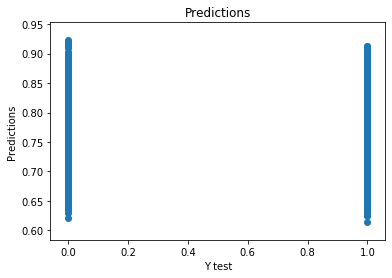

In [111]:
plt.scatter(y_test,predicts)
plt.xlabel('Y test')
plt.ylabel('Predictions')
plt.title('Predictions')
plt.show()

In [112]:
coefficients = pd.DataFrame(lm.coef_,x.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
tempo,2.011700e-04
duration_ms,-9.135950e-08
key,-1.007190e-02
popularity,-2.032097e-03


In [113]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predicts))
print('MSE:', metrics.mean_squared_error(y_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicts)))

MAE: 0.35269580841915166
MSE: 0.17710135782325315
RMSE: 0.42083412150543725


In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [115]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
predict = logmodel.predict(x_test)

In [117]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.13      0.00      0.00      1312
           1       0.76      1.00      0.86      4213

    accuracy                           0.76      5525
   macro avg       0.45      0.50      0.43      5525
weighted avg       0.61      0.76      0.66      5525



In [67]:
artists['mode'].value_counts()

1    21190
0     6431
Name: mode, dtype: int64

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()

In [120]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [121]:
scaler_features = scaler.transform(x)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
knn = KNeighborsClassifier(n_neighbors=9)

In [124]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [125]:
preds = knn.predict(x_test)

In [126]:
print(confusion_matrix(y_test,preds))

[[ 111 1201]
 [ 212 4001]]


In [127]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.34      0.08      0.14      1312
           1       0.77      0.95      0.85      4213

    accuracy                           0.74      5525
   macro avg       0.56      0.52      0.49      5525
weighted avg       0.67      0.74      0.68      5525

